# Music Popularity Predictor - Modeling

Greg Welliver   

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#
sns.set_context('notebook')

In [3]:
# load the data
X_train = pd.read_csv('../Data/X_train.csv', index_col =[0])
X_test = pd.read_csv('../Data/X_test.csv', index_col =[0])
y_train = pd.read_csv('../Data/y_train.csv', index_col =[0]) 
y_test = pd.read_csv('../Data/y_test.csv', index_col =[0])
y_test.head()

,Top100
233445,1
120671,1
68604,1
160156,0
52414,1


In [4]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

#### Algorithms to try:
- Logistic Regression
- Random Forest
- XGBoost
- Naive Bayes
- K-Nearest Neighbor


### Logistic Regression

In [5]:
lr_clf = LogisticRegression(max_iter = 500, random_state = 123)
lr_clf.fit(X_train, y_train.values.ravel())
print("Classification Report for Training Data")
print(classification_report(y_train, lr_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, lr_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1485
           1       0.89      0.96      0.92      1495

    accuracy                           0.92      2980
   macro avg       0.92      0.92      0.92      2980
weighted avg       0.92      0.92      0.92      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       378
           1       0.83      0.91      0.87       368

    accuracy                           0.87       746
   macro avg       0.87      0.87      0.87       746
weighted avg       0.87      0.87      0.87       746



#### Let's also look at a confusion matrix

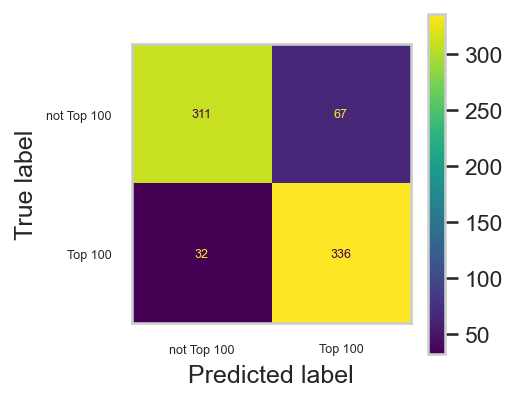

In [6]:
y_pred = lr_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = lr_clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not Top 100', 'Top 100'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 6)
ax.set_yticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 6)
plt.grid(False)
plt.rcParams.update({'font.size': 6})
display_cm.plot(ax = ax);

#### Now find the optimal hyperparameters

#### Use GridSearchCV

In [7]:
# using training data - commenting out because took forever to run
# grid={"C": [0.001, 0.1, 1, 10, 100], "penalty":["l1","l2"]}# l1 lasso l2 ridge
# logreg=LogisticRegression(solver = 'liblinear', max_iter = 500, random_state=123)
# logreg_cv=GridSearchCV(logreg,grid,cv=5)
# logreg_cv.fit(X_train, y_train.values.ravel())

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)
# print("train accuracy:", logreg_cv.score(X_train, y_train))
# print("test accuracy:", logreg_cv.score(X_test, y_test))

##### Output of above

- 

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.8771812080536913

- 
train accuracy: 0.9204697986577182
test accuracy: 0.8672922252010724

In [8]:
# now re-run with optimal hyperparameters
lr_clf = LogisticRegression(max_iter = 500, random_state = 123, C = 1, penalty='l2')
lr_clf.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1, max_iter=500, random_state=123)

In [9]:
print("Classification Report for Training Data")
print(classification_report(y_train, lr_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, lr_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1485
           1       0.89      0.96      0.92      1495

    accuracy                           0.92      2980
   macro avg       0.92      0.92      0.92      2980
weighted avg       0.92      0.92      0.92      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       378
           1       0.83      0.91      0.87       368

    accuracy                           0.87       746
   macro avg       0.87      0.87      0.87       746
weighted avg       0.87      0.87      0.87       746



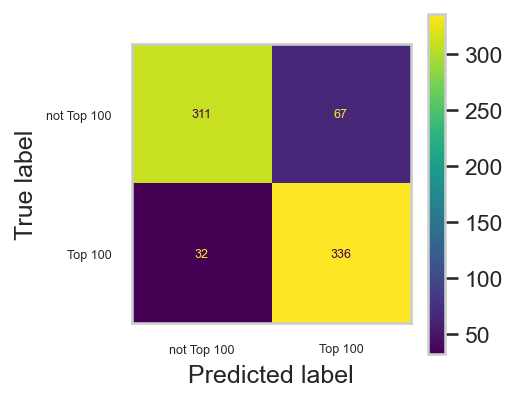

In [10]:
y_pred = lr_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = lr_clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not Top 100', 'Top 100'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 6)
ax.set_yticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 6)
plt.grid(False)
plt.rcParams.update({'font.size': 6})
display_cm.plot(ax = ax);

### Random Forest

In [11]:
# using 3 estimators
rf_clf = RandomForestClassifier(n_estimators=3, random_state = 123, n_jobs=-1)
rf_clf.fit(X_train, y_train.values.ravel())
y_pred = rf_clf.predict(X_test)
y_pred_prob = rf_clf.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1485
           1       0.96      0.97      0.96      1495

    accuracy                           0.96      2980
   macro avg       0.96      0.96      0.96      2980
weighted avg       0.96      0.96      0.96      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       378
           1       0.80      0.82      0.81       368

    accuracy                           0.81       746
   macro avg       0.81      0.81      0.81       746
weighted avg       0.81      0.81      0.81       746



In [12]:
# using 300 estimators
rf_clf = RandomForestClassifier(n_estimators=300, random_state = 123, n_jobs=-1)
rf_clf.fit(X_train, y_train.values.ravel())
y_pred = rf_clf.predict(X_test)
y_pred_prob = rf_clf.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      2980
   macro avg       1.00      1.00      1.00      2980
weighted avg       1.00      1.00      1.00      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       378
           1       0.84      0.91      0.87       368

    accuracy                           0.87       746
   macro avg       0.87      0.87      0.87       746
weighted avg       0.87      0.87      0.87       746



The model with 300 estimators is overfitting, as evidence by the 1.00 accuracy on the Training dataset

Confusion matrix, without normalization
[[315  63]
 [ 34 334]]


/var/folders/rc/20gvvbw10mg1xrcm82p5g4tm0000gn/T/ipykernel_60479/3336193561.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Normalized confusion matrix
[[0.83 0.17]
 [0.09 0.91]]


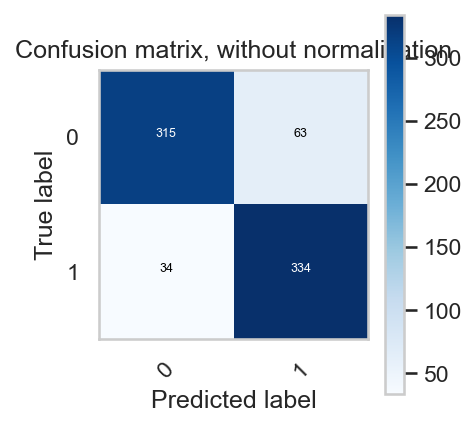

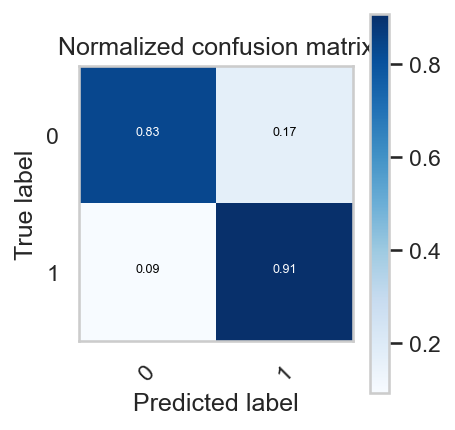

In [13]:
# look at confusion matrix
class_names=['0','1'] # name  of classes

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(False)
    #plt.rcParams.update({'font.size': 7})


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
#plt.rcParams.update({'font.size': 7})
plt.show()


#### Hyperparameter Tuning- RandomizedSearchCV

In [14]:
# set the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [15]:
# comment out to avoid lengthy run
# random_search = RandomizedSearchCV(RandomForestClassifier(random_state=123),
#                                    param_grid)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

##### Output of above:

- RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=9, random_state=123)

Now we will update the parameters of the model by those which are obtained by using RandomizedSearchCV.

In [16]:
rf_clf_rand = RandomForestClassifier(max_depth=3,
                                      max_leaf_nodes=9,
                                      random_state=123)
rf_clf_rand.fit(X_train, y_train.values.ravel())
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf_rand.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf_rand.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1485
           1       0.78      0.94      0.85      1495

    accuracy                           0.84      2980
   macro avg       0.85      0.84      0.84      2980
weighted avg       0.85      0.84      0.84      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       378
           1       0.76      0.91      0.83       368

    accuracy                           0.81       746
   macro avg       0.82      0.81      0.81       746
weighted avg       0.83      0.81      0.81       746



#### Optimize with GridSearchCV

In [17]:
# comment out to avoid lengthy run
# grid_search = GridSearchCV(RandomForestClassifier(random_state=123),
#                            param_grid=param_grid)
# grid_search.fit(X_train, y_train.values.ravel())
# print(grid_search.best_estimator_)

##### Output of above:
- RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=150, random_state=123)

Now we will update the parameters of the model by those which are obtained by using RandomizedSearchCV.

In [18]:
rf_clf_grid = RandomForestClassifier(max_depth=6,
                                      max_leaf_nodes=9,
                                      n_estimators = 150,
                                      random_state=123)
rf_clf_grid.fit(X_train, y_train.values.ravel())
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf_grid.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf_grid.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1485
           1       0.80      0.94      0.86      1495

    accuracy                           0.85      2980
   macro avg       0.86      0.85      0.85      2980
weighted avg       0.86      0.85      0.85      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       378
           1       0.77      0.93      0.85       368

    accuracy                           0.83       746
   macro avg       0.85      0.83      0.83       746
weighted avg       0.85      0.83      0.83       746



30


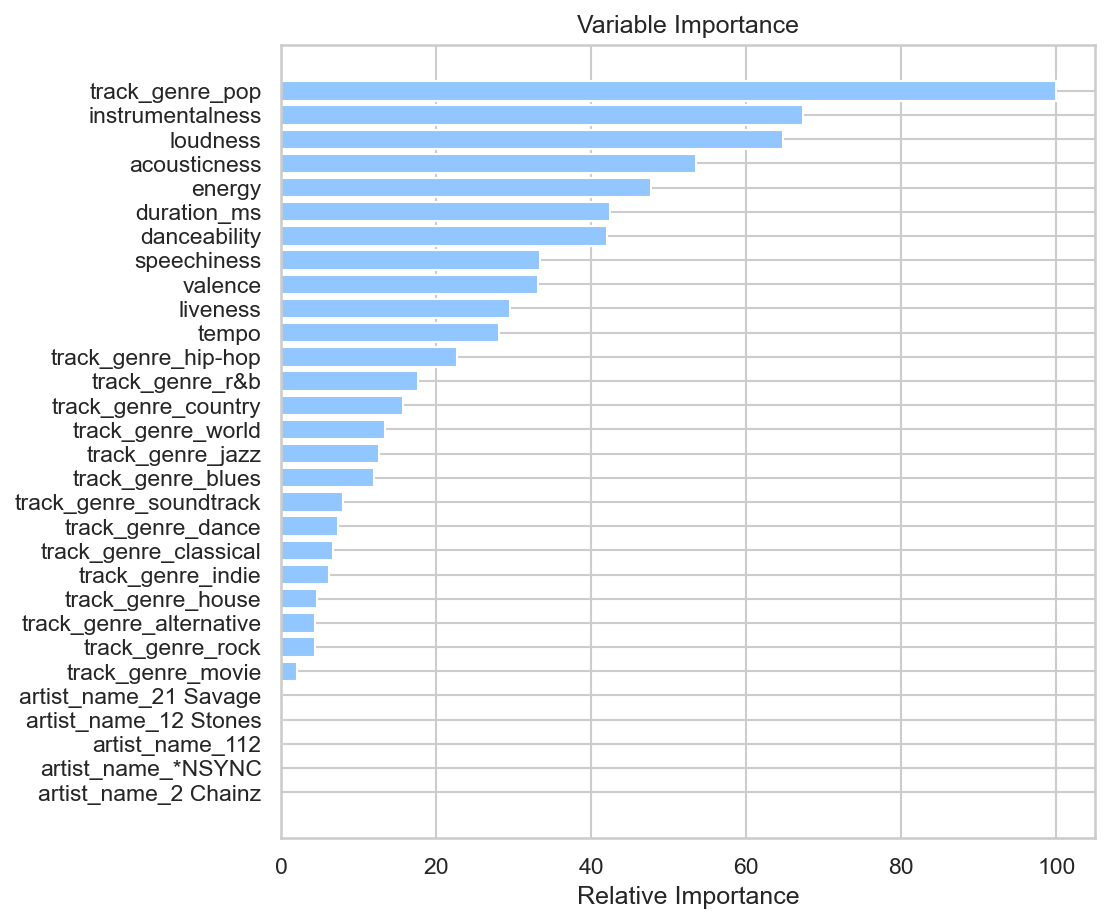

In [19]:
# plot feature importances
feature_importance = rf_clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(7,7))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();


### XGBoost

In [20]:
# xgboost
xgb_clf= XGBClassifier(random_state=123)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, xgb_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, xgb_clf.predict(X_test)))


Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      2980
   macro avg       1.00      1.00      1.00      2980
weighted avg       1.00      1.00      1.00      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       378
           1       0.86      0.87      0.86       368

    accuracy                           0.86       746
   macro avg       0.86      0.86      0.86       746
weighted avg       0.86      0.86      0.86       746



#### Random Search for optimization

In [21]:
params = { 'max_depth': [3, 6, 10],
           'learning_rate': [0.01, 0.1, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [22]:
# commented out because takes a long time to run
# random_search = RandomizedSearchCV(XGBClassifier(random_state=123),
#                                    params)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

#### output from above random search:

- 
XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=0.6, colsample_bynode=None,colsample_bytree=0.8999999999999999, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=0.3, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=10, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=123, ...)


Update the model with parameters

In [23]:
xgb_clf_rand= XGBClassifier(random_state=123, learning_rate = 0.3, max_depth = 10, n_estimators = 100, colsample_bylevel=0.6, colsample_bytree=0.8999999999999999)
xgb_clf_rand.fit(X_train, y_train)
y_pred = xgb_clf_rand.predict(X_test)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, xgb_clf_rand.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, xgb_clf_rand.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      2980
   macro avg       1.00      1.00      1.00      2980
weighted avg       1.00      1.00      1.00      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       378
           1       0.85      0.87      0.86       368

    accuracy                           0.86       746
   macro avg       0.86      0.86      0.86       746
weighted avg       0.86      0.86      0.86       746



#### GridSearchCV for optimization

In [24]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]
         }

In [25]:
# comment out to avoid lengthy run
# grid_search = GridSearchCV(XGBClassifier(random_state=123),
#                            param_grid=params, verbose=1)
# grid_search.fit(X_train, y_train.values.ravel())
# print(grid_search.best_estimator_)

#### Paste output here so don't need to run again:

Update model with best parameters

In [26]:
xgb_clf_grid= XGBClassifier(random_state=123)
xgb_clf_grid.fit(X_train, y_train)
y_pred = xgb_clf_grid.predict(X_test)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, xgb_clf_grid.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, xgb_clf_grid.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      2980
   macro avg       1.00      1.00      1.00      2980
weighted avg       1.00      1.00      1.00      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       378
           1       0.86      0.87      0.86       368

    accuracy                           0.86       746
   macro avg       0.86      0.86      0.86       746
weighted avg       0.86      0.86      0.86       746



### Naive Bayes

In [27]:
# Naive Bayes
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train.values.ravel())
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, nb_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, nb_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1485
           1       0.88      1.00      0.94      1495

    accuracy                           0.93      2980
   macro avg       0.94      0.93      0.93      2980
weighted avg       0.94      0.93      0.93      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       378
           1       0.65      0.94      0.77       368

    accuracy                           0.72       746
   macro avg       0.78      0.73      0.71       746
weighted avg       0.78      0.72      0.71       746



### KNN

In [28]:
# KNN - note read that this tends not to work well on large datasets
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)  
knn_clf.fit(X_train, y_train.values.ravel())
print("Classification Report for Training Data")
print(classification_report(y_train, knn_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, knn_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1485
           1       0.87      0.93      0.90      1495

    accuracy                           0.89      2980
   macro avg       0.90      0.89      0.89      2980
weighted avg       0.90      0.89      0.89      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       378
           1       0.81      0.87      0.84       368

    accuracy                           0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



In [29]:
# test range of K values
test_scores = []
train_scores = []

for i in range(1,10):

    knn_clf = KNeighborsClassifier(i)
    knn_clf.fit(X_train,y_train.values.ravel())
    
    train_scores.append(knn_clf.score(X_train,y_train))
    test_scores.append(knn_clf.score(X_test,y_test))


In [30]:
print(test_scores)
max(test_scores)

[0.8123324396782842, 0.7828418230563002, 0.8257372654155496, 0.8257372654155496, 0.8324396782841823, 0.8203753351206434, 0.8257372654155496, 0.8297587131367292, 0.8257372654155496]


0.8324396782841823

In [31]:
print(train_scores)
max(train_scores)

[0.9996644295302013, 0.9288590604026845, 0.9134228187919463, 0.9, 0.8929530201342282, 0.8932885906040269, 0.8808724832214765, 0.87751677852349, 0.8741610738255033]


0.9996644295302013

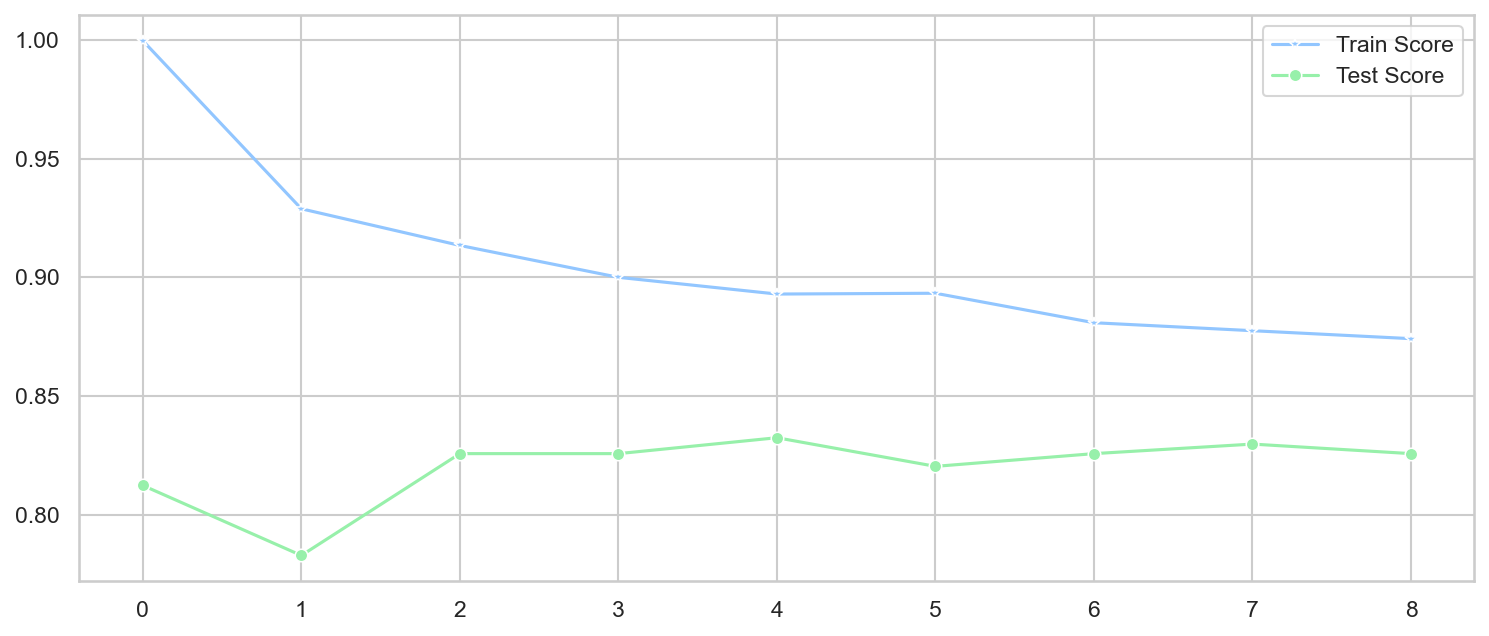

In [32]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

Based on this plot, it would appear that the best number of neighbors is 5 (four in the chart above), since this is the maximum score on the Test set

In [33]:
# create model with 5 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train.values.ravel())
y_predict_test = knn_clf.predict(X_test)
y_predict_training = knn_clf.predict(X_train)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, knn_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, knn_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1485
           1       0.87      0.93      0.90      1495

    accuracy                           0.89      2980
   macro avg       0.90      0.89      0.89      2980
weighted avg       0.90      0.89      0.89      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       378
           1       0.81      0.87      0.84       368

    accuracy                           0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



#### Using GridSearch to find optimal nearest neighbor

In [34]:
# Using GridSearch to find optimal nearest neighbor
parameters = {"n_neighbors": range(1, 20)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train.values.ravel())
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [35]:
gridsearch.best_params_

{'n_neighbors': 6}

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train.values.ravel())
y_predict_test = knn_clf.predict(X_test)
y_predict_training = knn_clf.predict(X_train)
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, knn_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, knn_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1485
           1       0.89      0.90      0.89      1495

    accuracy                           0.89      2980
   macro avg       0.89      0.89      0.89      2980
weighted avg       0.89      0.89      0.89      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       378
           1       0.81      0.82      0.82       368

    accuracy                           0.82       746
   macro avg       0.82      0.82      0.82       746
weighted avg       0.82      0.82      0.82       746



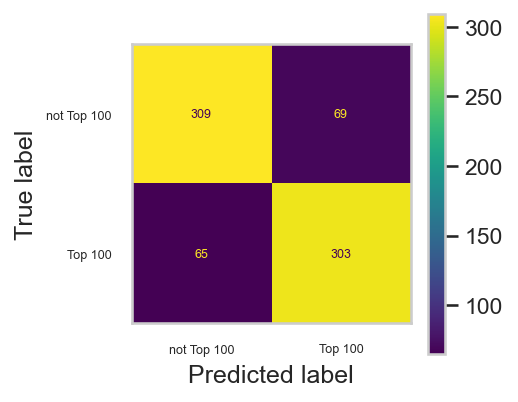

In [37]:
# let's look at a confusion matrix
y_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = knn_clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not Top 100', 'Top 100'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 6)
ax.set_yticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 6)
plt.grid(False)
plt.rcParams.update({'font.size': 6})
display_cm.plot(ax = ax);

### Metrics

https://docs.google.com/spreadsheets/d/1XeOVhqbcyKPQbFjLbLhdADAcCF-fXuSy2-01xcUH9Uw/edit#gid=0